## 7. Group Assignment & Presentation




__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

In [5]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, preprocessing, callbacks, Input, Sequential

2024-05-22 01:32:56.231458: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 01:32:56.268536: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 01:32:56.456538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 01:32:57.706821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


The dataset that we are using comes from kaggle. It contains pictures of cards. The problem that we are solving is classify card into correct combination of rank and suit, e.g "3 of spades". Therefore, there are 53 classes (with joker). The dataset on kaggle was already structured in a way that makes it easy to load using tensorflow. The are 3 folders: train, test and validation. Each folder contains 53 subfolders, one for each class. Each subfolder contains images of cards of that class. The images are originally 256x256 pixels. 

## Let's start by loading data, inspecting it and preprocessing it.

In [6]:
# to make training faster we will resize the images to 128x128
# we will use a batch size of 64 (the number of images that will be processed at once)
# we will train the model for up to 100 epochs (the number of times the model will see the entire dataset)

img_size = 128
batch_size = 64
n_epoch = 100


# load the data
# if the training is done locally, not in a hosted environment (such as on kaggle), the path might be different
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "data")


# load the data
# while loading we resize the images to 128x128 and shuffle the data so that the model does not learn the order of the images
# we also use one-hot encoding for the labels (this is format of label required by categorical_crossentropy loss function)
train_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, 'train'), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
    label_mode ='categorical')

val_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, 'valid'), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
label_mode ='categorical')

test_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, "test"), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
    label_mode ='categorical')


Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [14]:
import os

# let see the classes in the dataset
classes = os.listdir(os.path.join(data_path, 'train'))
classes.sort()
n_class = len(classes)

print(f"Number of classes: {n_class}")

# this dictionary will be useful later to convert the class index to class name during prediction
class_indices = {i: class_name for i, class_name in enumerate(classes)}

print(class_indices)

Number of classes: 53
{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spad

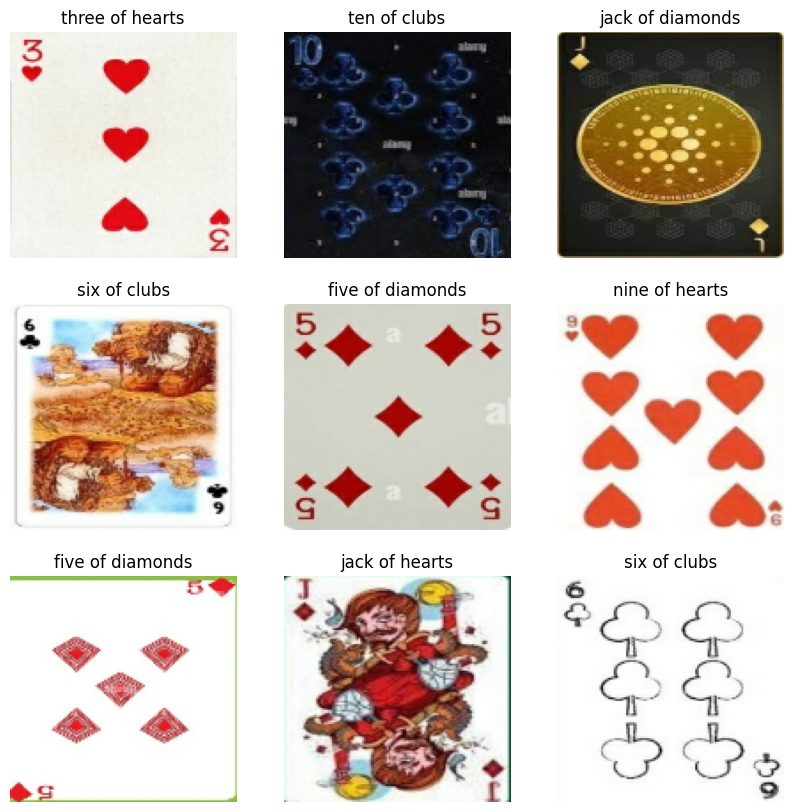

In [4]:
sample_batch = train_dataset.take(1)

# let's see random images from the dataset with their labels
for features, labels in sample_batch:

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(features[i].numpy().astype("uint8"))
        plt.title(class_indices[np.argmax(labels[i])])
        plt.axis("off")

    plt.show()


In [5]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(64, 128, 128, 3)
(64, 53)


Looking at the shape of data we can see that we are dealing with 4D input. The first dimension is batch dimension, so the number of images in the batch. The second and third dimensions are the height and width of the image. The last dimension is the number of channels in the image. We have 3 channels as the images are in RGB format. 

In [6]:
# let's how examplary image is represented in the dataset

for image_batch, labels_batch in train_dataset:
    print(image_batch[0].numpy().astype("uint8"))
    break

# as we can see the image is represented as a 3D matrix (128x128x3) with values between 0 and 255

[[[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [250 250 247]
  [243 244 239]
  [167 168 163]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 249]
  [250 251 246]
  [247 248 243]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 248]
  [253 254 249]
  [249 250 245]]

 ...

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [248 253 252]
  [251 251 248]
  [252 249 242]]

 [[252 252 252]
  [254 254 254]
  [254 254 254]
  ...
  [253 254 247]
  [254 250 234]
  [255 244 221]]

 [[252 252 252]
  [255 255 255]
  [254 254 254]
  ...
  [254 253 234]
  [247 238 205]
  [183 168 126]]]


In [7]:
# We don't to deal with data with values between 0 and 255, so we will rescale the pixel values to the range [0, 1]
def preprocess_image(image, label):
    # Rescale pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [8]:
# Here we first apply the rescaling function, then calling cache method, that will keep the images in memory after they're loaded off disk for the first time
# Then we shuffle the data and prefetch it, so that the next batch of data is ready to be processed while the current batch is being processed
# This will make the training faster
train_dataset = train_dataset.map(preprocess_image).cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().map(preprocess_image).shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().map(preprocess_image).shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
# now let's see how the image is represented after preprocessing

for image_batch, labels_batch in train_dataset:
    print(image_batch[0].numpy())
    break

# the pixel values are now between 0 and 1

[[[0.77683824 0.78125    0.7435049 ]
  [0.75441176 0.78186274 0.75441176]
  [0.79172796 0.7852941  0.77028185]
  ...
  [0.83143383 0.83143383 0.83143383]
  [0.808701   0.808701   0.808701  ]
  [0.81102943 0.81102943 0.81102943]]

 [[0.75533086 0.7646446  0.7244485 ]
  [0.7504289  0.77775735 0.75036764]
  [0.7997549  0.8004902  0.78296566]
  ...
  [0.8207108  0.8207108  0.8207108 ]
  [0.8189951  0.8189951  0.8189951 ]
  [0.81783086 0.81783086 0.81783086]]

 [[0.78792894 0.79509807 0.76390934]
  [0.766299   0.7867647  0.76280636]
  [0.7916054  0.79748774 0.7773897 ]
  ...
  [0.8215686  0.8215686  0.8215686 ]
  [0.8258578  0.8258578  0.8258578 ]
  [0.81482846 0.81482846 0.81482846]]

 ...

 [[0.7653799  0.7693015  0.74577206]
  [0.7738358  0.77775735 0.75422794]
  [0.7785539  0.7824755  0.75894606]
  ...
  [0.82371324 0.8387255  0.84270835]
  [0.8511642  0.8374387  0.84227943]
  [0.84362745 0.8315564  0.8153799 ]]

 [[0.75422794 0.7581495  0.7346201 ]
  [0.7721201  0.7760417  0.7525123 ]


### The obvious choice of model for image classification is Convolutional Neural Network (CNN), so we will start with that.

However, after that we will also try to use more standard machine learning models, such as Random Forest and SVM. Of course we won't be able to use the images directly as input to these models as this would result in massive number of features (128x128), so we will have to extract in some way features from the images. It's going to be interesting to see how well these models will perform compared to CNN.

### But first let's talk about neural net model architecture.

We are not going to do hyperparameter tuning for the neural net, as even running on GPU it would take massive amount of time (more about that down below). Instead we looked through other people architectures played with few of them, tweaked them a bit and settled on the one that gave us the best results. However, this means that with proper hyperparameter tuning we could probably get even better results.

We are going to use a convolutional neural network. It is going to be a quite deep one. The main points of this architecture are:
- model takes as input (128x128x3) images in a batch (a 4th dimension)
- the model is going have 4 blocks of convolutional layers with combined with max pooling
- each block contains of 2 same conv layers and then max pooling layer
- the number of filters in each block is going to increase, starting from 32 and ending with 256, that way the model is going to be able to learn more complex features
- the kernel size in each block is decreasing, starting from 7x7 and ending with 3x3, that way the model is going to be able to learn more detailed features
- each block contains of 2 same conv layers, it is a common technique, first layer might learn about simpler features such as edges, and the second layer might learn about more complex and abstract features of the image
- max pooling layer, decreases the number of parameters in the model, also it reduces noise by taking the maximum value in the region, the pool size is 2x2 so we are going to keep the most important information from every 2x2 region
- after convolutional blocks, we flatten the output, meaning we convert it from matrix to vector so that it can be fed to the the dense layers
- our model contains of 1 hidden fully connected layer and output layer
- in between fully connected layers there are dropout layers, they are there to prevent overfitting (so they serve as regularization mechanism), they randomly set some of the neurons weights to zero, so that the model is not able to rely on any single neuron (50% to disable a neuron)
- in all layers we use the same activation function, ReLU, as it is a very common choice, because it is computationally efficient
- following recommendations found online, to initialize weights in all layers we are going to use He initialization, it is a good choice for ReLU activation function
- in last layer we are going to use softmax activation function, as it is a multi-class classification problem, thanks to that will be able to get probabilities of each class
- the padding in convolutional layers is going to be 'same', so that the output has the same height and width as the input, otherwise we might have lost some information, as the filter would not be able to slide over the edges of the image, now with padding set up if there is not enough pixels to slide over, the missing pixels are filled with zeros (padded)
- as optimizer instead of SGD we are going to use Adam, it is recommended choice by community, as it is computationally efficient and requires little memory, it is also well suited for problems with large amounts of data and parameters
- the loss function is going to be categorical crossentropy, as it is a multi-class classification problem, during training we will be also measuring accuracy

In [10]:
def compile_model():
    model = Sequential([
        Input(shape=(img_size,img_size,3)),
        layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=96, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=96, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(units=256, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.5),
        layers.Dense(units=n_class, activation="softmax")
    ])

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In tenserflow Keras, there is a concepts of callbacks, these are types of functions that are called at certain points during training. We are going to use two of them. 

The first one is early stopping, it is going to monitor the validation loss and stop the training if it does not decrease for 12 epochs. It is a way to prevent overfitting and also we won't have to monitor the training process all the time + waste resources, when the model is actually not learning anything new anymore.

In [19]:
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

The second callback is learning rate scheduler, this allows us to implement learning rate decay, by reducing it from 0.001 to 0.0001 after 25 epochs. We do this, because as we get closer to minimum of loss function, we want to take smaller steps, so that we don't overshoot the minimum.

In [20]:
def lr_scheduler(epoch, lr):
    if epoch < 25:
        return 1E-3
    else:
        return 1E-4

learning_rate_decay_callback = callbacks.LearningRateScheduler(lr_scheduler)

Now let's train the model and see how it performs. 

Because the image data is quite complex one and the model architecture is quite deep, the training process is going to take some time.
Because of that, when we were training the model we didn't do it locally, but rather ran this notebook in kaggle environment, as they offer free GPU resources.
GPU allows to run training loop usin CUDA, which is a parallel computing platform and API model created by Nvidia. Gpus are created to perform parralel computations, so they are much faster than CPUs when it comes to training deep learning models.

On GPU instance singular epoch was taking around 20s to complete, while on CPU the time for singular epoch was in minutes

In [21]:
model = compile_model()

# train for 100 epochs, pass the callbacks we mentioned, and the training and validation datasets as well as desired batch size

history = model.fit(train_dataset, epochs=n_epoch, batch_size=batch_size, validation_data=val_dataset, callbacks=[early_stopping_callback, learning_rate_decay_callback])


Epoch 1/100


W0000 00:00:1716332804.454764     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 26/120 ━━━━━━━━━━━━━━━━━━━━ 32s 351ms/step - accuracy: 0.0179 - loss: 4.3000

W0000 00:00:1716332813.383501     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.0213 - loss: 4.0732

W0000 00:00:1716332829.430004     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 214ms/step - accuracy: 0.0213 - loss: 4.0725 - val_accuracy: 0.0189 - val_loss: 3.9709 - learning_rate: 0.0010
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0224 - loss: 3.9733 - val_accuracy: 0.0189 - val_loss: 3.9695 - learning_rate: 0.0010
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.0214 - loss: 3.9667 - val_accuracy: 0.0189 - val_loss: 3.9722 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.0234 - loss: 3.9620 - val_accuracy: 0.0642 - val_loss: 3.7147 - learning_rate: 0.0010
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.1147 - loss: 3.5083 - val_accuracy: 0.3019 - val_loss: 2.4888 - learning_rate: 0.0010
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.2706 - loss: 2.7246 - val_accuracy: 0.3925 - val_loss: 2.0879 - learning_rate: 0.0010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.3558 -

After 35 epochs, the training stop as we didn't see validation loss decrease in 10 epochs, so the callback fired and stopped training. During this time, the model achieved around 90% accuracy on the validation set and 94% on the training set. Let's see on the graph how the loss and accuracy changed during training. It is good that we stopped training, as we could already have started observing that the model was starting to slowly overfit.

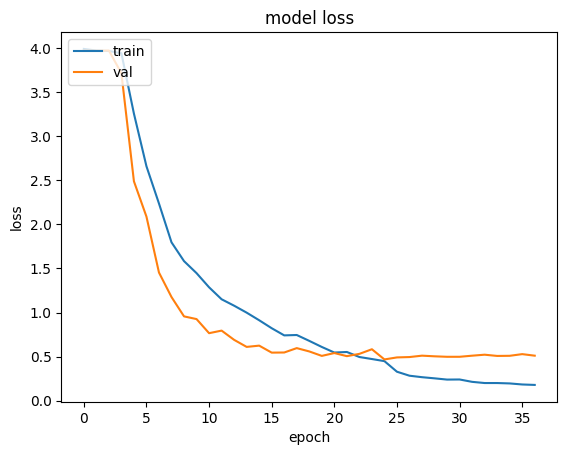

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

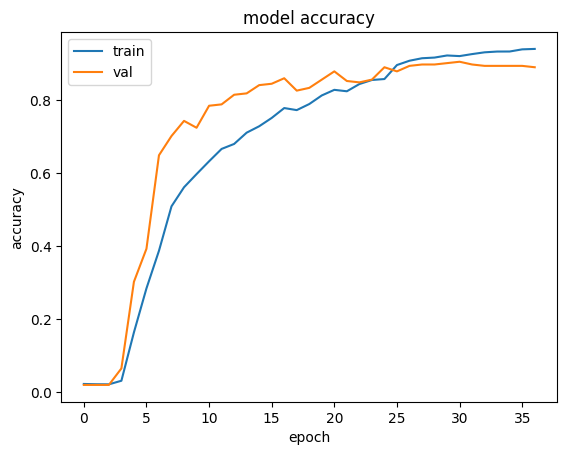

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [24]:
# finally let's evaluate the model on the test dataset
test_acc = model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8912 - loss: 0.4838


We got 89% accuracy on the test set, which we believe is quite a good result

In [25]:
# using save method we can save the model to disk, so that we can load it later and use it for prediction, without the need for retraining
model.save("model.h5")

If we want to load the model and use it for predictions, we can do it like this:
``` python
from keras.models import load_model

model = load_model("model.h5")
```

### Inference

To test the model in real life, scenario we downloaded 5 random pictures of cards from google (they are not in any of datasets). We want to try to see if the model will be able to classify them correctly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


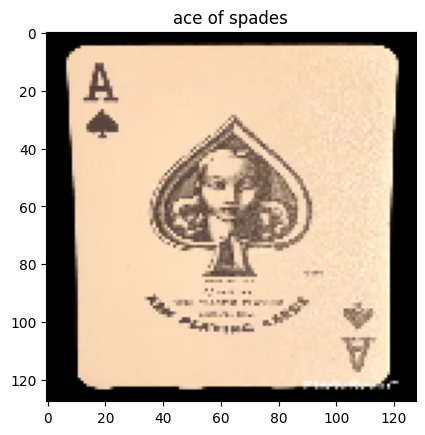

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


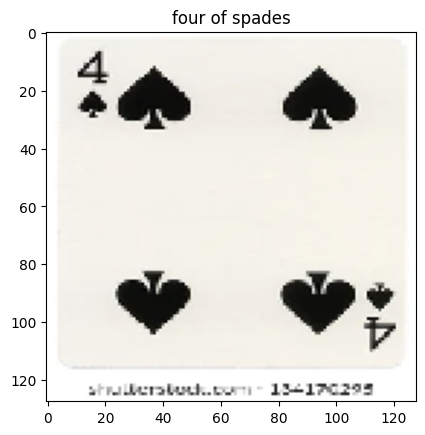

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


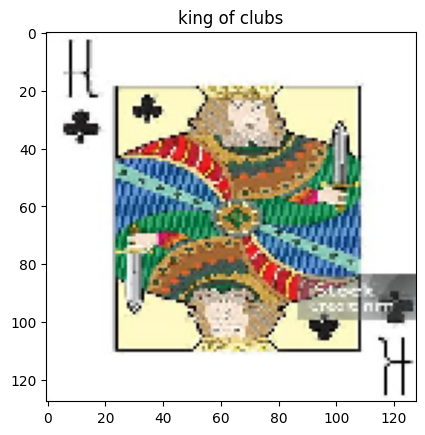

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


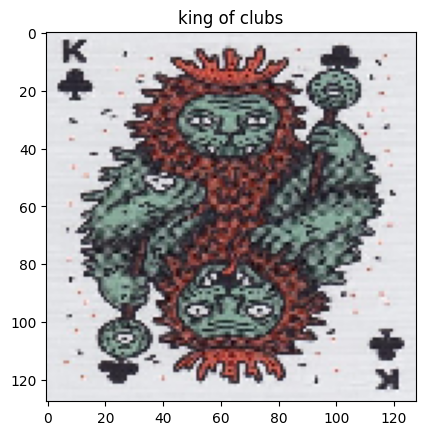

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


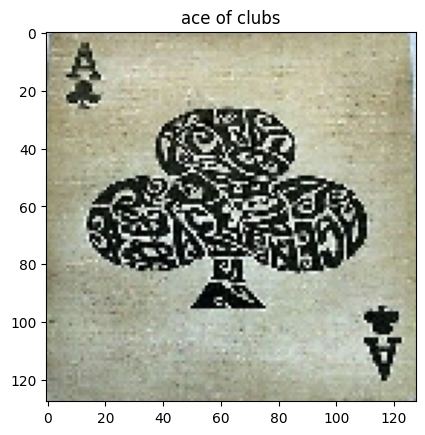

In [26]:
import numpy as np

# we can create a helper function that will take an image as input, preprocess it, and make a prediction and return the class name
def infer(img):
    # first we turn image into mathematical representation
    img_array = preprocessing.image.img_to_array(img)
    # our model is used to taking batches of images, so we need to expand the dimensions of the image
    # (adding a dimension of size 1 in front of the image array)
    # in order to create a fake batch (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a fake batch

    # Normalize the image data (because the model was trained on normalized data)
    img_array = img_array / 255.0

    # Make prediction
    prediction = model.predict(img_array)

    # Get index of the class with the highest probability
    index = np.argmax(prediction[0,:])

    # return the class name using the dictionary created at the beginning
    return class_indices[index]

# we stored our data in infer folder, we are also resizing it while loading
for i in range(5):
    path = os.path.join(data_path, "infer", str(1+i) + ".jpg")
    img = preprocessing.image.load_img(path, target_size=(img_size, img_size))
    plt.imshow(img)
    plt.title(infer(img))
    plt.show()

As we can see the model predicted 5/5 cards correctly, taking into consideration that they were random images from internet it is really awesome!

### Now let's move to classifying the images with more "standard" machine learning models.

First of all we have to process the data so that:
- we have are not using tf dataset anymore, but our familiar numpy arrays
- label is not one hot encoded, but rather label encoded
- we dont use each pixel as a feature, but rather extract some features from the images

For feature extraction we will combine two techniques:
- to get information about the color of the image we will use color histogram, it is a representation of the distribution of colors in an image, it counts the number of pixels that have colors in each of a fixed list of color ranges, this way we will be able to get information about the color distribution in the image
- to get information about the shapes and edges in the image we will use HOG (Histogram of Oriented Gradients). HOG captures directions and magnitudes of edges in an image, also extracts local shape information, it is a common technique used in object detection

In a nutshell, HOG works in a following manner:
1. Gradient computation: the first step is to calculate the gradient image in both x and y directions, this is done by convolving the image with Sobel kernels, the result is two images, one for each direction, that contain the gradient information
2. Orientation binning: the gradient image is divided into small cells, for each pixel in the cell, the gradient magnitude and orientation are calculated, the orientation is then quantized into bins, for example if we have 9 bins, the orientation from 0 to 20 degrees would be in the first bin, from 20 to 40 in the second bin and so on
3. Block normalization: the cells are grouped into blocks, for each block the histogram of gradients is calculated, the histogram is then normalized, so that the block is not sensitive to changes in lighting and contrast
4. Descriptor blocks: the normalized histograms are then concatenated into a single feature vector, this vector is the HOG descriptor of the image, that we can use as our features

To read more about HOG, you can check the following resources: 
- https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html
- https://medium.com/@dnemutlu/hog-feature-descriptor-263313c3b40d

In [1]:
from skimage.feature import hog

# we are using scikit-image library to extract HOG features
# parameters for the method
def extract_hog_features(image):
    # usually HOG works on grayscale images, so we convert the image to grayscale
    # we also going to have features related to color, so we are not afraid of losing information
    image = tf.image.rgb_to_grayscale(image)
    # we still have another dimension, representing singular grey channel, we need to squeeze it
    image = tf.squeeze(image).numpy()
    # we are getting our HOG features as well as the image with the HOG visualization of how the image is interpreted
    # so that we can show it
    # the parameters chosen for HOG, were chosen based on information from internet, as they seem to be quite common and universal ones
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    return features, hog_image

In [2]:
# to get features about the color of the image, we can use color histograms
# we are concatenating the histograms of the three color channels as our features related to color
def compute_color_histograms(image, bins=32, range=(0, 256)):
    hist_r = np.histogram(image[:, :, 0], bins=bins, range=range)[0]
    hist_g = np.histogram(image[:, :, 1], bins=bins, range=range)[0]
    hist_b = np.histogram(image[:, :, 2], bins=bins, range=range)[0]
    hist_features = np.concatenate([hist_r, hist_g, hist_b])
    return hist_features

In [3]:
# now we can create a function that will take a tf dataset and return the features as numpy array and labels
def tf_dataset_to_numpy(dataset, show_hog_images=False):
    features = []
    labels = []
    counter = 0
    # iterating over batches in the dataset
    for batch in dataset:
        # iterating over images and labels in the batch by zipping them together
        # our images were rescaled and normalized before, when training neural network, so we don't need to do it again
        for image, label in zip(batch[0], batch[1]):
            hog_features, hog_image= extract_hog_features(image)
            # let's show first 5 hog images to see how the images are interpreted in HOG
            if show_hog_images:
                plt.imshow(hog_image, cmap='gray')
                plt.show()
                counter += 1
                if counter == 5:
                    show_hog_images = False

            color_features = compute_color_histograms(image)
            features.append(np.concatenate([hog_features, color_features]))
            labels.append(np.argmax(label.numpy()))  # Convert one-hot labels to label encoding
    return np.array(features), np.array(labels)



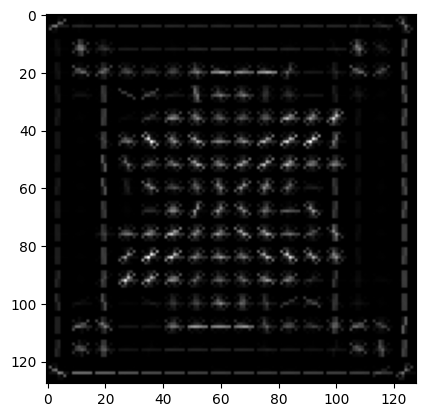

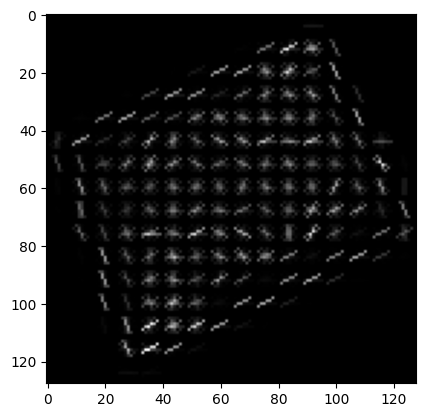

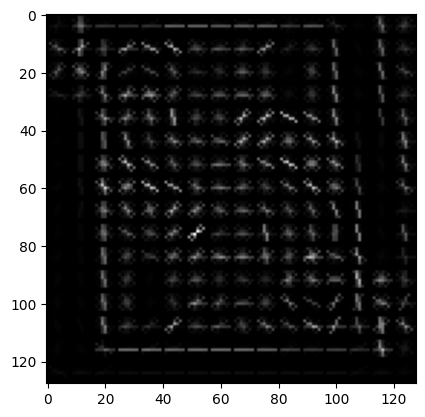

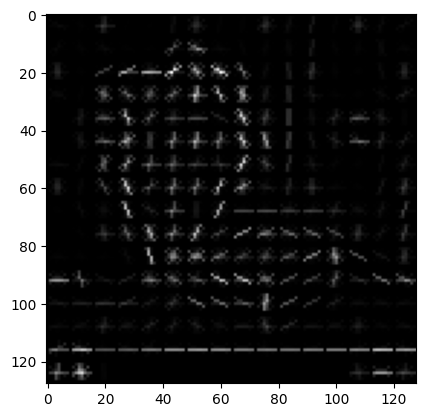

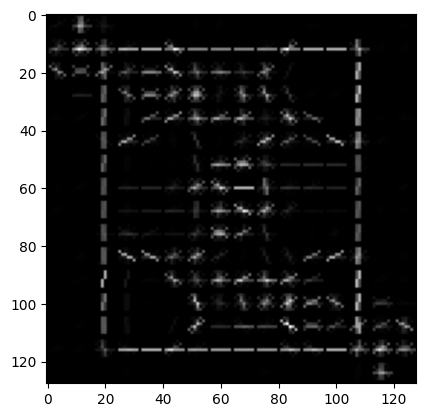

2024-05-22 01:39:52.941899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-22 01:40:08.023348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-22 01:40:25.024470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Converting train, val and test datasets using the functions we created
X_train, y_train = tf_dataset_to_numpy(train_dataset, True)
X_val, y_val = tf_dataset_to_numpy(val_dataset)
X_test, y_test = tf_dataset_to_numpy(test_dataset)

In [10]:
X_train.shape

(7624, 8196)

In [43]:
from sklearn.preprocessing import StandardScaler

# to help our models converge faster, we will scale all the features using StandardScaler
# it might be unnecessary as the images were already normalized, but maybe the extracted features are not

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

After extracting features, we end up with 8196 features. It is significantly less than 128x128x3 = 49152 features we would have if we used each pixel as a feature. However, we can still decrease the number of features using techniques such as PCA, to only keep let's say 80% of variance.

In [44]:
from sklearn.decomposition import PCA

# we can use PCA to reduce the dimensionality of the data

pca = PCA(n_components=0.8)

X_train_pca = pca.fit_transform(X_train)

X_train_pca.shape

(7624, 783)

After PCA we end up with 783 features, which is a significant decrease from 8196. We can now use these features to train our models. Of course, because we cover now only 80% of variance, the accuracy of the models might be lower than when using all features, but it is a tradeoff between accuracy and computational resources. This consideration is especially important because the 'standard' models from scikit-learn cannot run on GPU.

In [45]:
# transform val and test data using the same PCA object
X_val_pca = pca.transform(X_val)

X_test_pca = pca.transform(X_test)

We are going to try out following 3 models:

- **Random Forest**
- **K Nearest Neighbors**
- **SVC**

_Disclaimer: The hyperparameters optimalization that we are going to perform for each of the models, could have been even more detailed and contain more options. Again it is the matter of tradeoff between model performance and computational resources._

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {
    'n_estimators': [200, 300],
    'max_leaf_nodes': [30, 50, 70, 100],
    "max_features": ["sqrt", "log2"]
}

best_score = 0
best_params = {}

for n_estimators in params_grid['n_estimators']:
        for max_leaf_nodes in params_grid['max_leaf_nodes']:
            for max_features in params_grid['max_features']:
                rf = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, max_features=max_features, random_state=42)
                rf.fit(X_train_pca, y_train)
                val_score = rf.score(X_val_pca, y_val)

                if val_score > best_score:
                    best_score = val_score
                    best_params = {'n_estimators': n_estimators, 'max_leaf_nodes': max_leaf_nodes, 'max_features': max_features}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')

Best validation score: 0.5622641509433962
Best params: {'n_estimators': 300, 'max_leaf_nodes': 100, 'max_features': 'sqrt'}


In [47]:
# Initialize and train the random forest classifier using the best params
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(X_train_pca, y_train)

# Test the model accuracy on test
test_acc = clf.score(X_test_pca, y_test)
print(f"Test accuracy: {test_acc}")


Test accuracy: 0.5207547169811321


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev" ],
}

best_params = {}
best_score = 0

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        knn.fit(X_train_pca, y_train)

        val_score = knn.score(X_val_pca, y_val)
        if val_score > best_score:
            best_score = val_score
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')

Best validation score: 0.5132075471698113
Best params: {'n_neighbors': 5, 'metric': 'euclidean'}


In [55]:
# Initialize using the best params
clf = KNeighborsClassifier(**best_params)

# Fit the model to the training data
clf.fit(X_train_pca, y_train)

# Test the model
test_acc = clf.score(X_test_pca, y_test)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.4830188679245283


### Support Vector Classifier

In [49]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

best_score = 0
best_params = {}

for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        svm = SVC(C=C, kernel=kernel, random_state=42)
        svm.fit(X_train_pca, y_train)

        val_score = svm.score(X_val_pca, y_val)
        if val_score > best_score:
            best_score = val_score
            best_params = {'C': C, 'kernel': kernel}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')

Best validation score: 0.7849056603773585
Best params: {'C': 10, 'kernel': 'rbf'}


In [50]:
# Initialize the SVM classifier with best params
clf = SVC(**best_params, random_state=42)

clf.fit(X_train_pca, y_train)

# Test the model accuracy on test set
test_acc = clf.score(X_test_pca, y_test)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.7471698113207547


### Conclusion

As expected we receive the best test accuracy using CNN (89%), the neural net architecture could be probably even deeper, more optimized and the results would be even better, but we are happy with the result we got.

Suprisingly second best model was Support Vector Classifier with test accuracy of 75%, we were shocked seeing that good of result, on 'standard' model put to task of classifying images. It shows the power of feature extraction and engineering techniques. We were able to went down from 49152 (using every pixel within every channel as feature) features to 783 (HOG features + color spectograms + PCA to reduce dimensionality) and still get quite good results, even though we only cover 80% of variance. One could argue that this model was even better than neural net, as the time it took to train was a fraction of the time it took to train the neural net (+ we didn't have to use GPU).

Both random forest and K nearest neighbors performed around 50% accuracy on the test set, which is not so good as models mentioned above, but we need to take into consideration that the data is quite complex and we have 53 classes, meaning if the models were guessing the prediction randomly, they would get 1/53 = 1.9% accuracy on average, so they are still much better than random guessing. Moreover, at least in random forest case, we believe even more hyperparameter tuning could have been done to get better results.

### BONUS

A real use-case for the model could be for example found in casinos during poker games. It could detect the hand of each player and automatically return the strength of the hand. Below we implemented a single algorithm, where we take random 5 cards images from test set to imitate player's hand, then we first used our trained model to predicted what are the cards on hand. Next we count number of each rank and suit, and based on that we can return the strength of the hand (e.g. "Full house", "Two pairs", "Flush", etc.).

The algorithm and few examples of its usage using our neural net are presented below.

_Disclaimer: we treated joker as an ace in order to avoid crazy edgecases_



In [39]:
from collections import Counter

# mapping between rank names and their numerical values
ranks = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six': 4,
    'seven': 5,
    'eight': 6,
    'nine': 7,
    'ten': 8,
    'jack': 9,
    'queen': 10,
    'king': 11,
    'ace': 12
}


def score_poker_hand(images):

    # get model predictions
    model_prediction = model.predict(images)

    # get the class name of the predicted class for each image 
    model_prediction = np.argmax(model_prediction, axis=1)

    predicted_classes = [class_indices[i] for i in model_prediction]

    hand = []

    # if the model predicts joker, we will replace it with ace of clubs
    # otherwise extract rank value and suit from the predicted class name
    for card in predicted_classes:
        if 'joker' in card:
            hand.append((ranks['ace'], 'clubs'))
            continue
        rank, suit = card.split(" of ")
        rank = ranks[rank]
        hand.append((rank, suit))

    # count the number of occurrences of each rank and suit in the hand
    hand_ranks = Counter([i[0] for i in hand])

    hand_suits = Counter([i[1] for i in hand])

    fig, ax = plt.subplots(1, 5, figsize=(20, 5))

    for i in range(5):
        ax[i].imshow(images[i])
        ax[i].axis("off")
        ax[i].set_title(predicted_classes[i])

    # from here down, it's a logic to determine the poker hand based on the hand ranks and suits
    # unfortunately, no machine learning involved, just straight up logic
    is_flush = len(hand_suits) == 1

    is_straight = max(hand_ranks) - min(hand_ranks) == 4 and len(hand_ranks) == 5

    if is_flush and is_straight:
        if max(hand_ranks) == 12:
            fig.suptitle("Royal flush", fontsize=24)
            plt.show()
            return
        else:
            fig.suptitle("Straight flush", fontsize=24)
            plt.show()
            return
    
    if len(hand_ranks) == 2:
        if 4 in hand_ranks.values():
            fig.suptitle("Four of a kind", fontsize=24)
            plt.show()
            return
        else:
            fig.suptitle("Full house", fontsize=24)
            plt.show()
            return
    
    if is_flush:
        fig.suptitle("Flush", fontsize=24)
        plt.show()
        return

    if is_straight:
        fig.suptitle("Straight", fontsize=24)
        plt.show()
        return
    
    if 3 in hand_ranks.values():
        fig.suptitle("Three of a kind", fontsize=24)
        plt.show()
        return

    if list(hand_ranks.values()).count(2) == 2:
        fig.suptitle("Two pair", fontsize=24)
        plt.show()
        return

    if 2 in hand_ranks.values():
        fig.suptitle("One pair", fontsize=24)
        plt.show()
        return
    
    fig.suptitle("High Card", fontsize=24)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


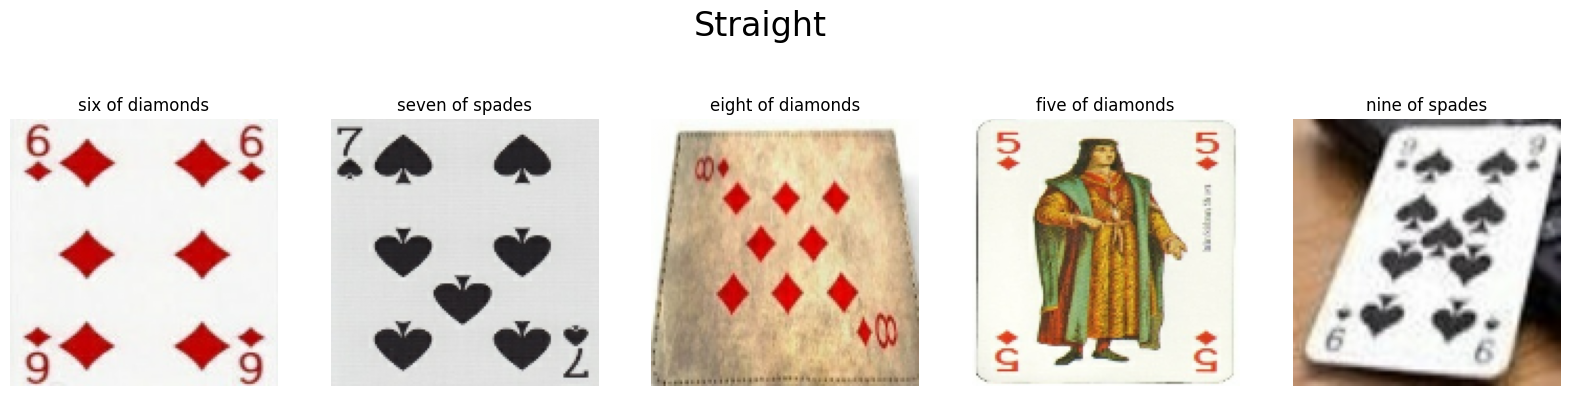

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


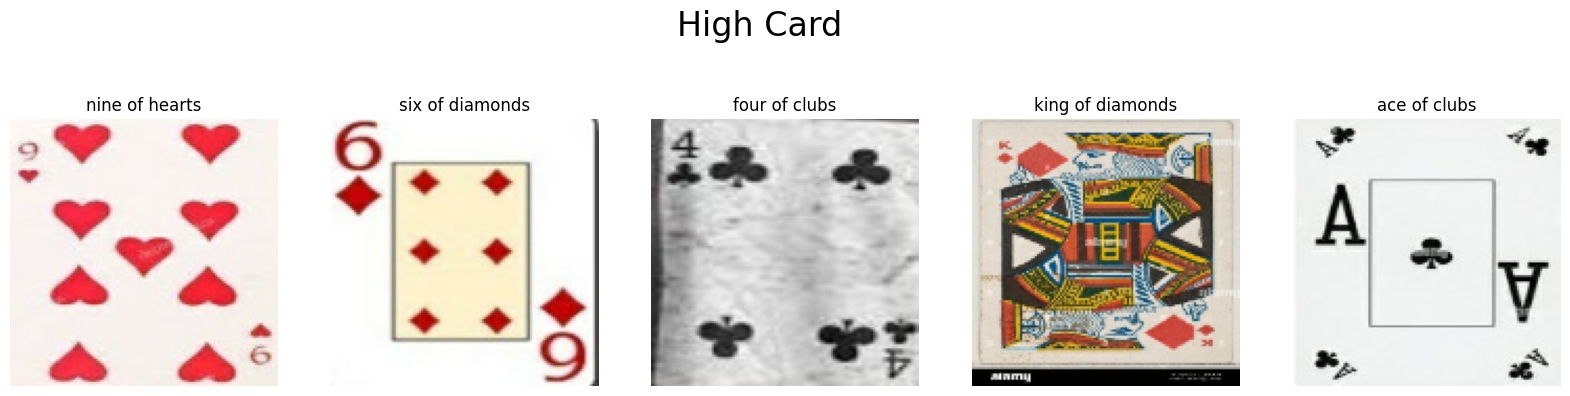

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


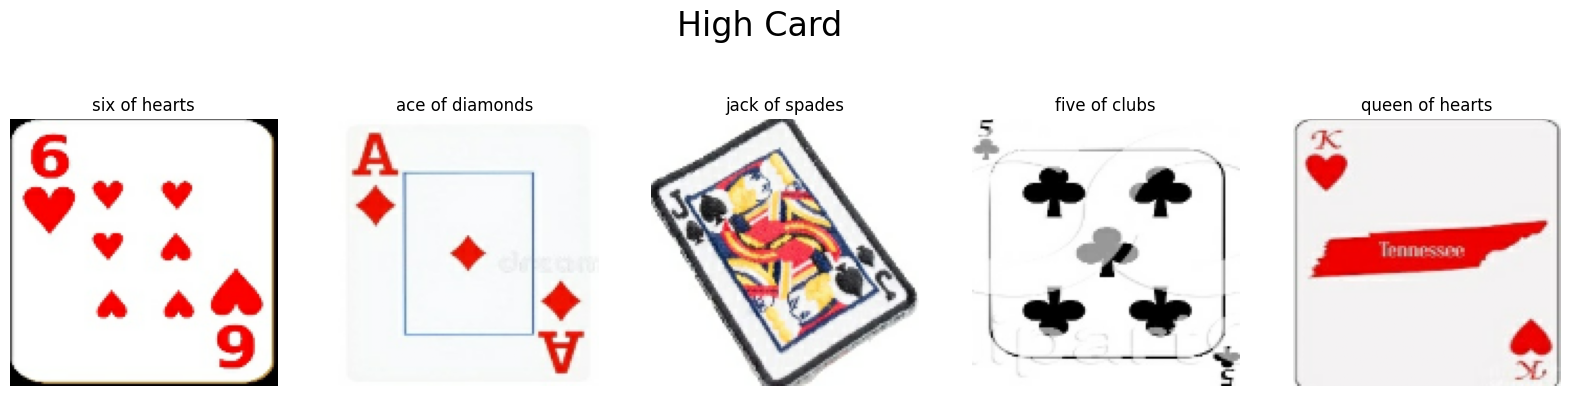

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


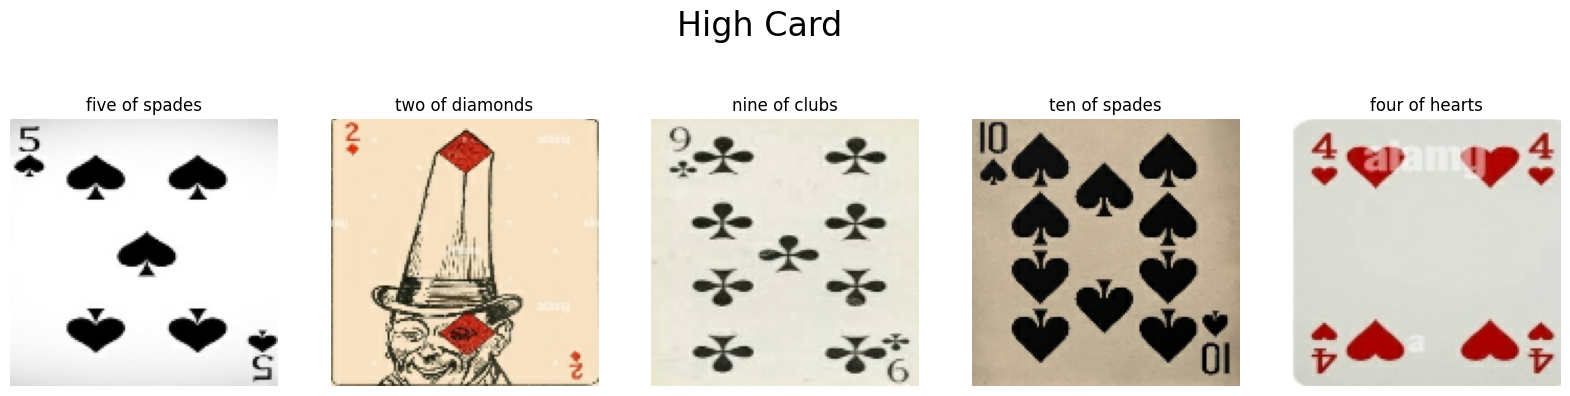

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


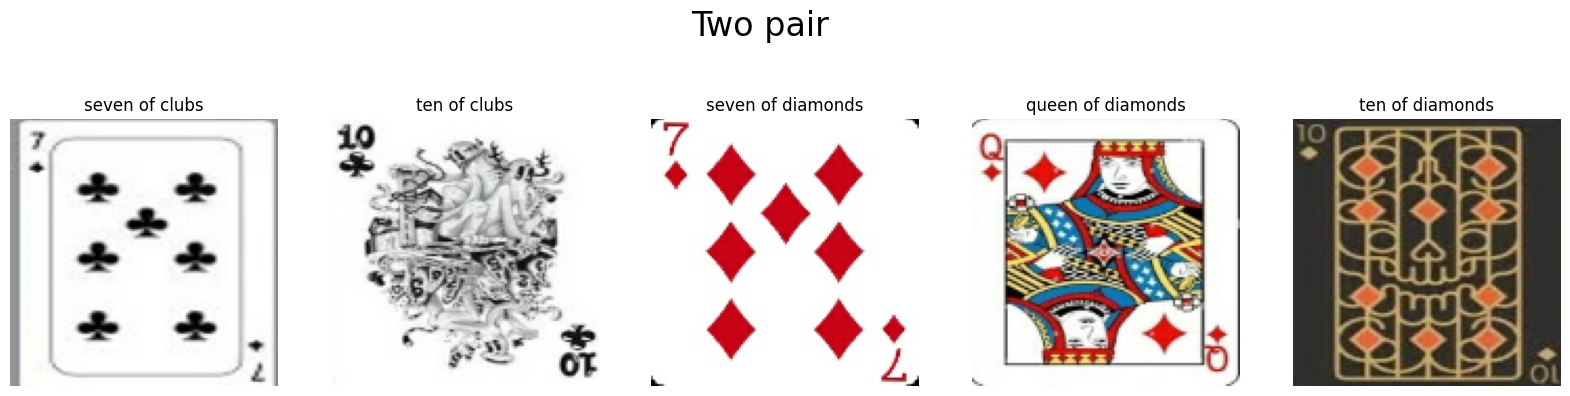

2024-05-22 01:46:12.606039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
sample_batch = test_dataset.take(1)

for features, labels in sample_batch:

    i = 0
    while True: 
        if len(features) < 5:
            continue
        score_poker_hand(features[i:i+5,:].numpy())
        i += 5
        if i == 25:
            break

